## Introduction
Disease prediction utilizes predictive analytics and machine learning techniques to identify individuals 
at risk of developing a specific illness. This involves analyzing extensive datasets containing 
medical history and demographic factors to recognize patterns and risk factors associated with different diseases.
Machine learning algorithms are employed to process this data, aiding in the identification of individuals predisposed 
to a particular ailment. This proactive approach enables healthcare professionals to offer personalized preventive care
and early intervention, ultimately enhancing the effectiveness of disease management strategies.


In [1]:
#Imprting Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import pickle

C:\Users\kavya\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
#Importing the dataset
train = pd.read_csv("E:/final p/Training.csv")
test = pd.read_csv("E:/final p/Testing.csv")

In [3]:
train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [4]:
train.shape

(4920, 134)

In [5]:
#Removing Redundant Columns
train['Unnamed: 133'].value_counts()

Series([], Name: Unnamed: 133, dtype: int64)

In [6]:
train.drop("Unnamed: 133",axis = 1, inplace = True)

In [7]:
#checking for null values if any
train.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [8]:
train.isnull().sum().sum()

0

### here we dont have any null values so no need to handle anything we can skip this part

In [9]:
train.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [10]:
#Descriptive analysis--- used to study the basic features of data with the statistical process.
train.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
test.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [12]:
test.shape

(42, 133)

In [13]:
len(train.prognosis.unique())

41

In [14]:
train.prognosis.value_counts()

Pneumonia                                  120
Bronchial Asthma                           120
Dengue                                     120
Varicose veins                             120
Fungal infection                           120
Hypothyroidism                             120
Osteoarthristis                            120
Acne                                       120
Urinary tract infection                    120
Chicken pox                                120
Hepatitis D                                120
hepatitis A                                120
GERD                                       120
Malaria                                    120
Paralysis (brain hemorrhage)               120
Common Cold                                120
Hepatitis C                                120
Migraine                                   120
Typhoid                                    120
Hypertension                               120
Diabetes                                   120
Cervical spon

In [15]:
for i in train.columns:
    print(train[i].value_counts())

0    4242
1     678
Name: itching, dtype: int64
0    4134
1     786
Name: skin_rash, dtype: int64
0    4812
1     108
Name: nodal_skin_eruptions, dtype: int64
0    4698
1     222
Name: continuous_sneezing, dtype: int64
0    4812
1     108
Name: shivering, dtype: int64
0    4122
1     798
Name: chills, dtype: int64
0    4236
1     684
Name: joint_pain, dtype: int64
0    4698
1     222
Name: stomach_pain, dtype: int64
0    4698
1     222
Name: acidity, dtype: int64
0    4812
1     108
Name: ulcers_on_tongue, dtype: int64
0    4812
1     108
Name: muscle_wasting, dtype: int64
0    3006
1    1914
Name: vomiting, dtype: int64
0    4704
1     216
Name: burning_micturition, dtype: int64
0    4812
1     108
Name: spotting_ urination, dtype: int64
0    2988
1    1932
Name: fatigue, dtype: int64
0    4806
1     114
Name: weight_gain, dtype: int64
0    4806
1     114
Name: anxiety, dtype: int64
0    4806
1     114
Name: cold_hands_and_feets, dtype: int64
0    4692
1     228
Name: mood_swings, dty

In [16]:
train['fluid_overload'].unique()

array([0], dtype=int64)

In [17]:
train.drop('fluid_overload',axis = 1, inplace = True)

In [18]:
#multivariate analysis-comparing more features at a time
corr = train.corr()
corr.style.background_gradient('coolwarm')

In [19]:
#we drop the some columns due to high correlation
train.drop(['weight_gain','cold_hands_and_feets','anxiety','irregular_sugar_level',
           'yellow_urine','acute_liver_failure','swelling_of_stomach',
           'drying_and_tingling_lips','continuous_feel_of_urine',
          'internal_itching','polyuria','mood_swings','receiving_unsterile_injections',
          'stomach_bleeding','prominent_veins_on_calf','loss_of_smell','throat_irritation',
          'redness_of_eyes','sinus_pressure','runny_nose','pain_during_bowel_movements',
          'pain_in_anal_region','cramps','bruising','enlarged_thyroid','brittle_nails',
          'swollen_extremeties','slurred_speech','distention_of_abdomen','fluid_overload.1',
          'skin_peeling','silver_like_dusting','small_dents_in_nails','blister',
          'red_sore_around_nose','bloody_stool','swollen_blood_vessels','hip_joint_pain',
          'painful_walking','spinning_movements','altered_sensorium','toxic_look_(typhos)'],axis =1, inplace = True)

In [20]:
#new correlation matrix
corr = train.corr()
corr.style.background_gradient('coolwarm')

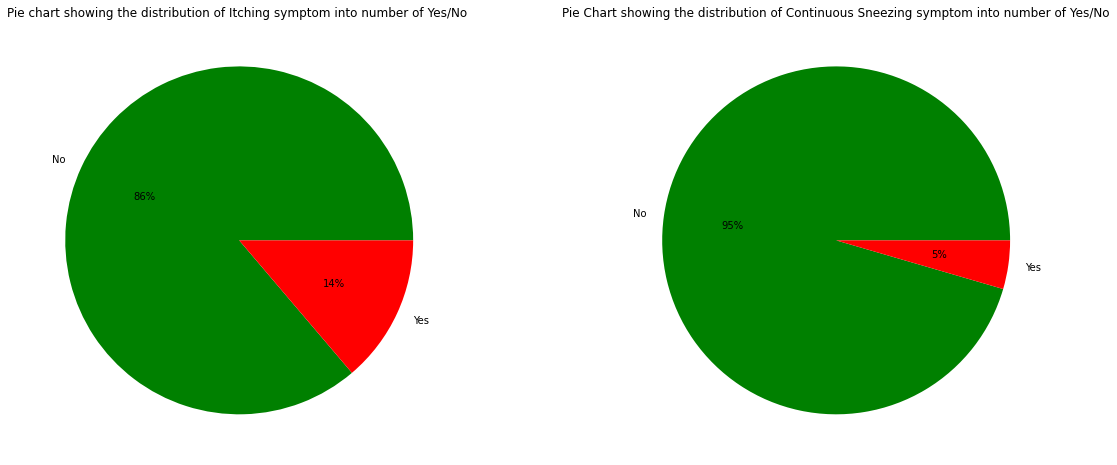

In [21]:
#data Visualization
#Univariate Analysis -- understanding the data with a single feature.
#creating a side-by-side comparison of pie charts for distribution of 'itching' and 'continuous_sneezing' symptoms
plt.figure(figsize = (8,8))

a = train['itching'].value_counts()
plt.subplot(121)
plt.pie(x = a, data = train, labels= ['No','Yes'], autopct='%.0f%%',colors = 'gr')
plt.title("Pie chart showing the distribution of Itching symptom into number of Yes/No ")

b = train['continuous_sneezing'].value_counts()
plt.subplot(122)
plt.pie(x = b, data = train, labels= ['No','Yes'], autopct='%.0f%%',colors = 'gr')
plt.title('Pie Chart showing the distribution of Continuous Sneezing symptom into number of Yes/No')

plt.subplots_adjust(left = 0.5, right = 2.4)

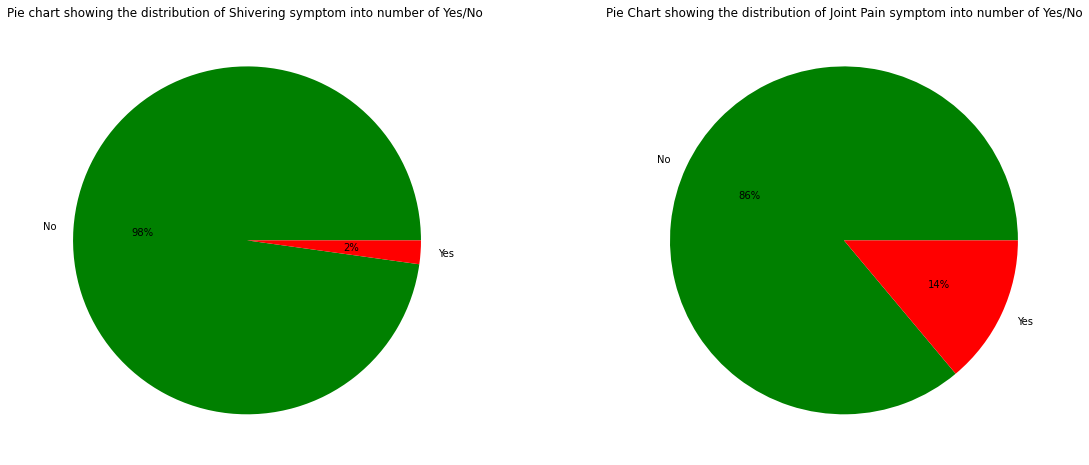

In [22]:
#creating a side-by-side comparison of pie charts for distribution of 'shivering' and 'joint pain ' symptoms
plt.figure(figsize = (8,8))

a = train['shivering'].value_counts()
plt.subplot(121)
plt.pie(x = a, data = train, labels= ['No','Yes'], autopct='%.0f%%',colors = 'gr')
plt.title("Pie chart showing the distribution of Shivering symptom into number of Yes/No ")

b = train['joint_pain'].value_counts()
plt.subplot(122)
plt.pie(x = b, data = train, labels= ['No','Yes'], autopct='%.0f%%',colors = 'gr')
plt.title('Pie Chart showing the distribution of Joint Pain symptom into number of Yes/No')

plt.subplots_adjust(left = 0.5, right = 2.4)

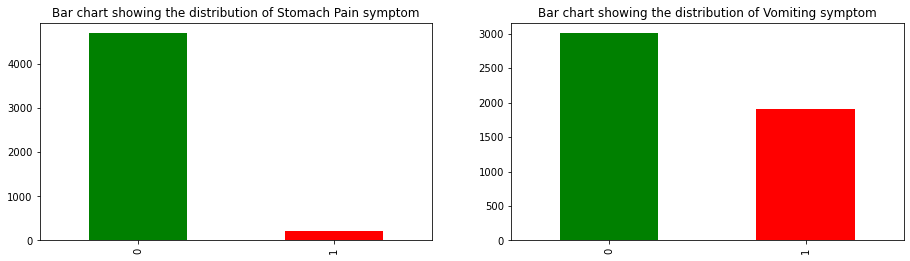

In [23]:
#creating a side-by-side comparison of bar graphs for below distribution 
plt.subplot(1,2,1)
train['stomach_pain'].value_counts().plot(kind = 'bar', color = ['g','r'])
plt.title("Bar chart showing the distribution of Stomach Pain symptom")

plt.subplot(1,2,2)
train['vomiting'].value_counts().plot(kind = 'bar', color = ['g','r'])
plt.title("Bar chart showing the distribution of Vomiting symptom")

plt.subplots_adjust(left = 0.5, right = 2.5)

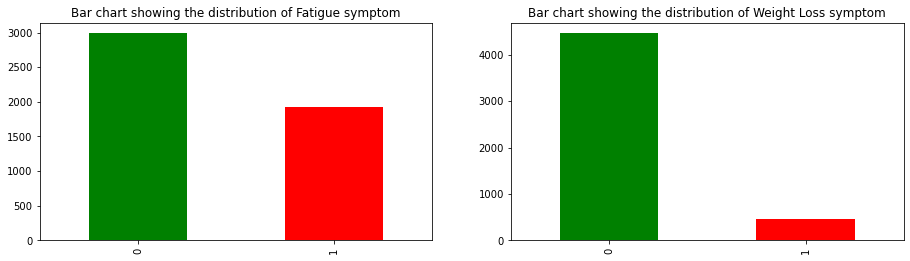

In [24]:
#creating a side-by-side comparison of bar graphs for below distribution 
plt.subplot(1,2,1)
train['fatigue'].value_counts().plot(kind = 'bar', color = ['g','r'])
plt.title("Bar chart showing the distribution of Fatigue symptom")

plt.subplot(1,2,2)
train['weight_loss'].value_counts().plot(kind = 'bar', color = ['g','r'])
plt.title("Bar chart showing the distribution of Weight Loss symptom")

plt.subplots_adjust(left = 0.5, right = 2.5)

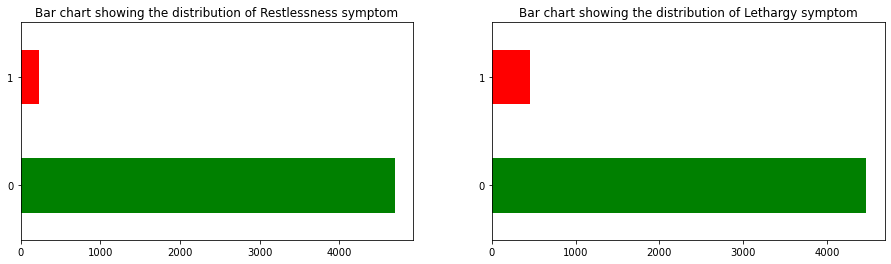

In [25]:
#creating a side-by-side comparison of bar graphs horizontally for below distribution 
plt.subplot(1,2,1)
train['restlessness'].value_counts().plot(kind = 'barh', color = ['g','r'])
plt.title("Bar chart showing the distribution of Restlessness symptom")

plt.subplot(1,2,2)
train['lethargy'].value_counts().plot(kind = 'barh', color = ['g','r'])
plt.title("Bar chart showing the distribution of Lethargy symptom")

plt.subplots_adjust(left = 0.5, right = 2.5)

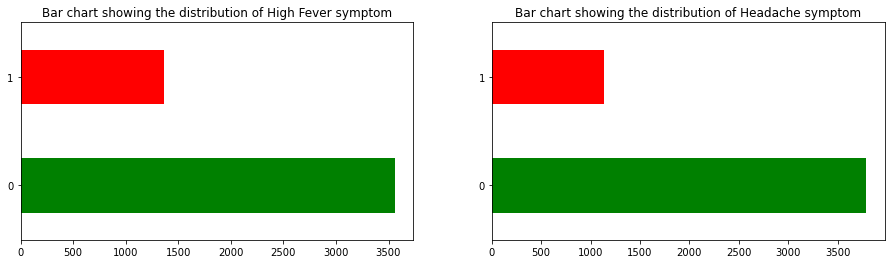

In [26]:
#creating a side-by-side comparison of bar graphs horizontally for below distribution 
plt.subplot(1,2,1)
train['high_fever'].value_counts().plot(kind = 'barh', color = ['g','r'])
plt.title("Bar chart showing the distribution of High Fever symptom")

plt.subplot(1,2,2)
train['headache'].value_counts().plot(kind = 'barh', color = ['g','r'])
plt.title("Bar chart showing the distribution of Headache symptom")

plt.subplots_adjust(left = 0.5, right = 2.5)

In [27]:
train[(train['itching'] == 1) & (train['stomach_pain'] == 1)]

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,coma,history_of_alcohol_consumption,blood_in_sputum,palpitations,pus_filled_pimples,blackheads,scurring,inflammatory_nails,yellow_crust_ooze,prognosis
40,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
41,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
43,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
44,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
46,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4719,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
4760,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
4801,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
4842,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


### Bivariate Analysis:
To find the relation between two features

Text(0.5, 1.0, 'Importance of Itching symptom to determine Fungal Infection')

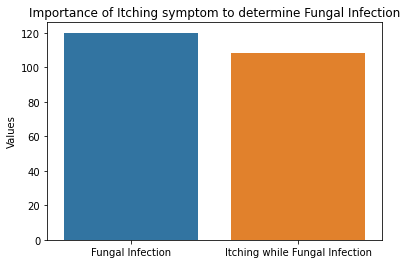

In [28]:
a = len(train[train['prognosis'] == 'Fungal infection'])
b = len(train[(train['itching'] == 1) & (train['prognosis'] == 'Fungal infection')])
fi = pd.DataFrame(data = [a,b], columns=['Values'],index = ['Fungal Infection','Itching while Fungal Infection'])

sns.barplot(data = fi, x = fi.index, y = fi['Values'])
plt.title('Importance of Itching symptom to determine Fungal Infection')

Text(0.5, 1.0, 'Importance of High Fever symptom to determine Jaundice')

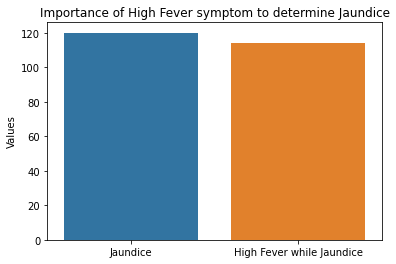

In [29]:
a = len(train[train['prognosis'] == 'Jaundice'])
b = len(train[(train['high_fever'] == 1) & (train['prognosis'] == 'Jaundice')])
fi = pd.DataFrame(data = [a,b], columns=['Values'],index = ['Jaundice','High Fever while Jaundice'])

sns.barplot(data = fi, x = fi.index, y = fi['Values'])
plt.title('Importance of High Fever symptom to determine Jaundice')

Text(0.5, 1.0, 'Importance of Yellowing of Eyes symptom to determine Tuberculosis')

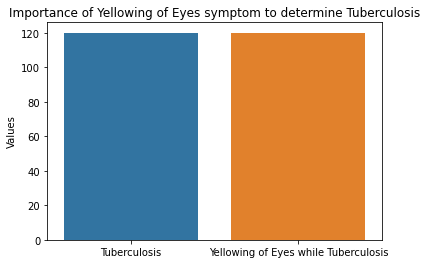

In [30]:

a = len(train[train['prognosis'] == 'Tuberculosis'])
b = len(train[(train['yellowing_of_eyes'] == 1) & (train['prognosis'] == 'Tuberculosis')])
fi = pd.DataFrame(data = [a,b], columns=['Values'],index = ['Tuberculosis','Yellowing of Eyes while Tuberculosis'])

sns.barplot(data = fi, x = fi.index, y = fi['Values'])
plt.title('Importance of Yellowing of Eyes symptom to determine Tuberculosis')

Text(0.5, 1.0, 'Importance of History of Consumption symptom to determine Alcoholic hepatitis')

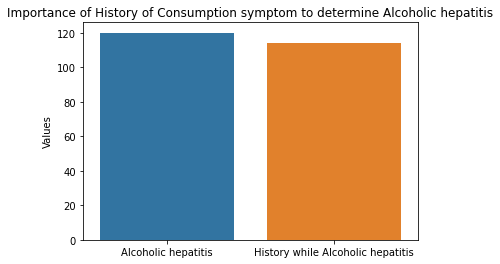

In [31]:

a = len(train[train['prognosis'] == 'Alcoholic hepatitis'])
b = len(train[(train['history_of_alcohol_consumption'] == 1) & (train['prognosis'] == 'Alcoholic hepatitis')])
fi = pd.DataFrame(data = [a,b], columns=['Values'],index = ['Alcoholic hepatitis','History while Alcoholic hepatitis'])

sns.barplot(data = fi, x = fi.index, y = fi['Values'])
plt.title('Importance of History of Consumption symptom to determine Alcoholic hepatitis')

In [32]:
a = train[train['prognosis'] == 'Tuberculosis']
a.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,coma,history_of_alcohol_consumption,blood_in_sputum,palpitations,pus_filled_pimples,blackheads,scurring,inflammatory_nails,yellow_crust_ooze,prognosis
250,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Tuberculosis
251,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Tuberculosis
252,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Tuberculosis
253,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Tuberculosis
254,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Tuberculosis


C:\Users\kavya\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 72.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='weight_loss', ylabel='fatigue'>

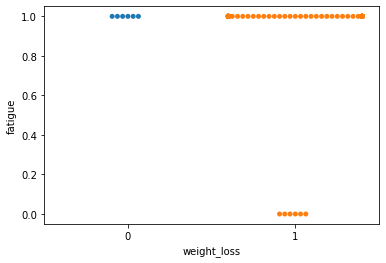

In [33]:
sns.swarmplot(x = a['weight_loss'], y = a['fatigue'])

In [34]:
train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,coma,history_of_alcohol_consumption,blood_in_sputum,palpitations,pus_filled_pimples,blackheads,scurring,inflammatory_nails,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [35]:
#We can create a function for test data preprocessing which will only leave us with the required features.
def data_preprocessing(data):
    data.drop(['fluid_overload','weight_gain','cold_hands_and_feets','anxiety','irregular_sugar_level',
           'yellow_urine','acute_liver_failure','swelling_of_stomach',
           'drying_and_tingling_lips','continuous_feel_of_urine',
          'internal_itching','polyuria','mood_swings','receiving_unsterile_injections',
          'stomach_bleeding','prominent_veins_on_calf','loss_of_smell','throat_irritation',
          'redness_of_eyes','sinus_pressure','runny_nose','pain_during_bowel_movements',
          'pain_in_anal_region','cramps','bruising','enlarged_thyroid','brittle_nails',
          'swollen_extremeties','slurred_speech','distention_of_abdomen','fluid_overload.1',
          'skin_peeling','silver_like_dusting','small_dents_in_nails','blister',
          'red_sore_around_nose','bloody_stool','swollen_blood_vessels','hip_joint_pain',
          'painful_walking','spinning_movements','altered_sensorium','toxic_look_(typhos)'],axis =1, inplace = True)
    return data

In [36]:
#We split the training data into features(X) and target variable(y).
X = train.drop('prognosis',axis = 1)
y = train.prognosis

In [37]:
#Split training data into training(80%), validation data(20%)
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.2)

In [38]:
test = data_preprocessing(test)

In [39]:
#Here we split the test data into features(X_test) and the corresponding target variables(y_test)
X_test = test.drop('prognosis',axis = 1)
y_test = test.prognosis

In [40]:
def model_evaluation(classifier):
    y_pred = classifier.predict(X_val)
    yt_pred = classifier.predict(X_train)
    y_pred1 = classifier.predict(X_test)
    print('The Training Accuracy of the algorithm is ', accuracy_score(y_train, yt_pred))
    print('The Validation Accuracy of the algorithm is ', accuracy_score(y_val, y_pred))
    print('The Testing Accuracy of the algorithm is', accuracy_score(y_test, y_pred1))
    return [(accuracy_score(y_train, yt_pred)), (accuracy_score(y_val, y_pred)), (accuracy_score(y_test, y_pred1))]

In [41]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [42]:
knn_results = model_evaluation(knn)

The Training Accuracy of the algorithm is  1.0
The Validation Accuracy of the algorithm is  1.0
The Testing Accuracy of the algorithm is 1.0


In [43]:
svm = SVC(C=1)
svm.fit(X_train, y_train)

SVC(C=1)

In [44]:
svm_results = model_evaluation(svm)

The Training Accuracy of the algorithm is  1.0
The Validation Accuracy of the algorithm is  1.0
The Testing Accuracy of the algorithm is 1.0


In [45]:
dtc = DecisionTreeClassifier(max_features= 10)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_features=10)

In [46]:
dtc_results = model_evaluation(dtc)

The Training Accuracy of the algorithm is  1.0
The Validation Accuracy of the algorithm is  1.0
The Testing Accuracy of the algorithm is 0.9761904761904762


In [47]:
rfc = RandomForestClassifier(max_depth = 13)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=13)

In [48]:
rfc_results = model_evaluation(rfc)

The Training Accuracy of the algorithm is  1.0
The Validation Accuracy of the algorithm is  1.0
The Testing Accuracy of the algorithm is 0.9761904761904762


In [49]:
#Testing model with Multiple Evaluatiton metrics
results = pd.DataFrame(data = [knn_results, svm_results, dtc_results, rfc_results],
                      columns= ['Training Accuracy','Validation Accuracy', 'Testing Accuracy'],
                      index = ['K Nearest Neighbors Classifier','Support Vector Machines',
                               'Decision Trees Classifier', 'Random Forest Classifier'])

In [50]:
results

,Training Accuracy,Validation Accuracy,Testing Accuracy
K Nearest Neighbors Classifier,1.0,1.0,1.00000
Support Vector Machines,1.0,1.0,1.00000
Decision Trees Classifier,1.0,1.0,0.97619
Random Forest Classifier,1.0,1.0,0.97619


In [51]:
#We can check the feature importance using the Random Forest Classifier model.
a = rfc.feature_importances_

In [52]:
col = X.columns

In [53]:
feat_imp = {}
for i, j in zip(a,col):
    feat_imp[j] = i

In [54]:
feat_imp

{'itching': 0.011774032425580673,
 'skin_rash': 0.007241202608728456,
 'nodal_skin_eruptions': 0.0027358866421039784,
 'continuous_sneezing': 0.009910955596113775,
 'shivering': 0.00971557795997768,
 'chills': 0.009165960313556449,
 'joint_pain': 0.013366839582351518,
 'stomach_pain': 0.005419558423438437,
 'acidity': 0.0055385087453628966,
 'ulcers_on_tongue': 0.007516397534192122,
 'muscle_wasting': 0.007133396221666308,
 'vomiting': 0.01076990965711016,
 'burning_micturition': 0.0037559264185494275,
 'spotting_ urination': 0.0021202740595620793,
 'fatigue': 0.010136474381609821,
 'weight_loss': 0.014953223166354796,
 'restlessness': 0.01402295892369474,
 'lethargy': 0.01169987391710434,
 'patches_in_throat': 0.008641349273301074,
 'cough': 0.004823859330212786,
 'high_fever': 0.010807207173189394,
 'sunken_eyes': 0.011970682614528804,
 'breathlessness': 0.005521818117616318,
 'sweating': 0.009207872581494733,
 'dehydration': 0.0039834553414809975,
 'indigestion': 0.00926712549336066

In [55]:
def model_evaluation1(n_feat,classifier):
    y_pred = classifier.predict(X1_val)
    yt_pred = classifier.predict(X1_train)
    y_pred1 = classifier.predict(X1_test)
    return [(n_feat),(accuracy_score(y1_train, yt_pred)), (accuracy_score(y1_test, y_pred1))]

In [56]:
rfc_results = []
knn_results = []

In [57]:
#We will drop columns which have very less feature importance.
#we have created a for loop which will train the model and give out the accuracy.
for main in [0.020,0.018,0.016,0.014,0.012,0.01,0.008]:
    to_drop = []
    for i,j in zip(feat_imp.keys(),feat_imp.values()):
        if j < main:
            to_drop.append(i)
    
    X_new = X.drop(to_drop,axis = 1)
    y_new = y
    X1_train, X1_val, y1_train, y1_val = train_test_split(X_new, y_new, test_size=0.2)
    X1_test = X_test.drop(to_drop,axis = 1)
    y1_test = y_test
    rfc_new = RandomForestClassifier()
    rfc_new.fit(X1_train, y1_train)
    temp1 = model_evaluation1(X1_train.shape[1], rfc_new)
    rfc_results.append(temp1)
    knn_new = KNeighborsClassifier()
    knn_new.fit(X1_train, y1_train)
    temp2 = model_evaluation1(X1_train.shape[1],knn_new)
    knn_results.append(temp2)

In [58]:
randomf = pd.DataFrame(data = rfc_results,columns=['Number of features','Training Accuracy','Testing Accuracy'])

In [59]:
randomf

,Number of features,Training Accuracy,Testing Accuracy
0,3,0.099085,0.095238
1,9,0.248222,0.238095
2,17,0.435213,0.428571
3,24,0.579522,0.571429
4,33,0.718496,0.714286
5,53,0.936230,0.928571
6,63,0.965955,0.952381


In [60]:
knn_table = pd.DataFrame(data = knn_results,columns=['Number of features','Training Accuracy','Testing Accuracy'])

In [61]:
knn_table

,Number of features,Training Accuracy,Testing Accuracy
0,3,0.098069,0.095238
1,9,0.244411,0.238095
2,17,0.427846,0.428571
3,24,0.576220,0.571429
4,33,0.716717,0.714286
5,53,0.935976,0.952381
6,63,0.964685,0.952381


In [62]:
#Building Model with appropriate features
to_drop = []
for i,j in zip(feat_imp.keys(),feat_imp.values()):
    if j < 0.01:
        to_drop.append(i)

In [63]:
len(to_drop)

36

In [64]:
X_new = X.drop(to_drop,axis = 1)
y_new = y

In [65]:
X_new.head()

,itching,joint_pain,vomiting,fatigue,weight_loss,restlessness,lethargy,high_fever,sunken_eyes,dark_urine,...,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,coma,history_of_alcohol_consumption,blood_in_sputum,palpitations,scurring,inflammatory_nails,yellow_crust_ooze
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
X1_train, X1_val, y1_train, y1_val = train_test_split(X_new, y_new, test_size=0.2)
X1_test = X_test.drop(to_drop,axis = 1)
y1_test = y_test

In [67]:
rfc_new = RandomForestClassifier()
rfc_new.fit(X1_train, y1_train)

RandomForestClassifier()

In [68]:
y_pred = rfc_new.predict(X1_val)
yt_pred = rfc_new.predict(X1_train)
y_pred1 = rfc_new.predict(X1_test)
print('The Training Accuracy of the algorithm is ', accuracy_score(y1_train, yt_pred))
print('The Validation Accuracy of the algorithm is ', accuracy_score(y1_val, y_pred))
print('The Testing Accuracy of the algorithm is', accuracy_score(y1_test, y_pred1))

The Training Accuracy of the algorithm is  0.9352134146341463
The Validation Accuracy of the algorithm is  0.9359756097560976
The Testing Accuracy of the algorithm is 0.9285714285714286


In [69]:
knn_new = KNeighborsClassifier()
knn_new.fit(X1_train, y1_train)

KNeighborsClassifier()

In [70]:
y_pred = knn_new.predict(X1_val)
yt_pred = knn_new.predict(X1_train)
y_pred1 = knn_new.predict(X1_test)
print('The Training Accuracy of the algorithm is ', accuracy_score(y1_train, yt_pred))
print('The Validation Accuracy of the algorithm is ', accuracy_score(y1_val, y_pred))
print('The Testing Accuracy of the algorithm is', accuracy_score(y1_test, y_pred1))

The Training Accuracy of the algorithm is  0.931910569105691
The Validation Accuracy of the algorithm is  0.943089430894309
The Testing Accuracy of the algorithm is 0.9285714285714286


In [71]:
#comparing our predicted results with the actual values.
test.join(pd.DataFrame(y_pred1,columns=["predicted"]))[["prognosis","predicted"]]

,prognosis,predicted
0,Fungal infection,Fungal infection
1,Allergy,Allergy
2,GERD,GERD
3,Chronic cholestasis,Chronic cholestasis
4,Drug Reaction,Fungal infection
5,Peptic ulcer diseae,Peptic ulcer diseae
6,AIDS,AIDS
7,Diabetes,Diabetes
8,Gastroenteritis,Gastroenteritis
9,Bronchial Asthma,Bronchial Asthma


In [72]:
X1_train.sum(axis = 1).max()

10

In [73]:
X1_train.columns

Index(['itching', 'joint_pain', 'vomiting', 'fatigue', 'weight_loss',
       'restlessness', 'lethargy', 'high_fever', 'sunken_eyes', 'dark_urine',
       'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'constipation',
       'abdominal_pain', 'mild_fever', 'yellowing_of_eyes',
       'swelled_lymph_nodes', 'blurred_and_distorted_vision', 'congestion',
       'chest_pain', 'fast_heart_rate', 'irritation_in_anus', 'neck_pain',
       'obesity', 'swollen_legs', 'puffy_face_and_eyes', 'knee_pain',
       'muscle_weakness', 'swelling_joints', 'unsteadiness',
       'bladder_discomfort', 'passage_of_gases', 'depression', 'irritability',
       'muscle_pain', 'red_spots_over_body', 'belly_pain',
       'abnormal_menstruation', 'watering_from_eyes', 'increased_appetite',
       'mucoid_sputum', 'rusty_sputum', 'lack_of_concentration',
       'visual_disturbances', 'receiving_blood_transfusion', 'coma',
       'history_of_alcohol_consumption', 'blood_in_sputum', 'palpitations',
       's

In [75]:
#Model Deployment
pickle.dump(knn_new, open('model.pkl','wb'))